In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

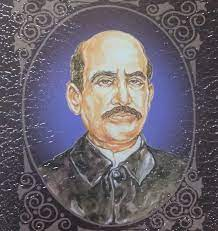

# CHAPTER 3 Random Walks

##  Introduction

Another way of modelling the gambler’s ruin problem of the last chapter is as a one-dimensional random walk. Suppose that $a+1$ positions are marked out on a straight line and numbered $0, 1, 2, \ldots, a$. A person starts at $k$ where $0 < k < a$. The walk proceeds in such a way that at each step there is a probability $p$ that the walker goes ‘forward’ one place to $k+1$, and a probability $q = 1-p$ that the walker goes ‘back’ one place to $k-1$. The walk continues until either $0$ or $a$ is reached, and then ends.

Generally, in a random walk, the position of a walker after having moved $n$ times is known as the state of the walk after $n$ steps or after covering $n$ stages. Thus the walk described above starts at stage $k$ at step $0$ and moves to either stage $k-1$ or stage $k+1$ after $1$ step, and so on.

A random walk is said to be **symmetric** if $p = q = \frac{1}{2}$. If the walk is bounded, then the ends of the walk are known as **barriers**, and they may have various properties. In this case the barriers are said to be **absorbing**, which implies that the walk must end once a barrier is reached since there is no escape. On the other hand, the barrier could be **reflecting**, in which case the walk returns to its previous state.

A useful diagrammatic way of representing random walks is by a **transition** or **process diagram** as shown in Figure 3.1. In a transition diagram the possible stages of the walker can be represented by points on a line. If a transition between two points can occur in one step, then those points are joined by a curve or edge, as shown with an arrow indicating the direction of the walk and a weighting denoting the probability of the step occurring. In discrete mathematics or graph theory the transition diagram is known as a **directed graph**. A walk in the transition diagram is a succession of edges covered without a break. In Figure 3.1 the closed loops with weightings of $1$ at the ends of the walk indicate the absorbing barriers with no escape.

```
p   p   p               p
o---o---o--- ... ---o---o---o
0   1   2           a-2 a-1 a
q   q   q               q
```

**Figure 3.1** Transition diagram for a random walk with absorbing barriers at each end of the walk.

## 3.2 Unrestricted random walks

A simple random walk on a line or in one dimension occurs when a step forward ($+1$) has probability $p$ and a step back ($-1$) has probability $q(= 1-p)$. At the $i$-th step the modified Bernoulli random variable $W\_i$ (see Section 1.7) is observed, and the position of the walk at the $n$-th step is the random variable:

$$X_n = X_0 + \sum_{i=1}^n W_i = X_{n-1} + W_n \quad (3.1)$$

In the gambler’s ruin problem, $X\_0 = k$, but in the following discussion it is assumed, without loss of generality, that walks start from the origin so that $X\_0 = 0$.

The random walks described so far are restricted by barriers. We now consider random walks without barriers, or **unrestricted random walks** as they are known. In these walks, the position or state $x$ can take any of the values ${\ldots, -2, -1, 0, 1, 2, \ldots}$. In particular, we are interested in the position of the walk after a number of steps and the probability of a return to the origin, the start of the walk.

As seen from Eqn (3.1), the position of the walk at step $n$ simply depends on the position at the $(n-1)$th step. This means that the simple random walk possesses what is known as the **Markov property**: the current state of the walk depends on its immediate previous state, not on the history of the walk up to the present state. Furthermore $X_n = X_{n-1} \pm 1$, and we know that the transition probabilities from one position to another $P(X_n = j | X_{n-1} = j-1) = p$, and $P(X_n = j | X_{n-1} = j+1) = q$, are independent of $n$, the number of steps in the walk.

It is straightforward to find the mean and variance of $X_n$ from (3.1) with $X_0 = 0$:

$$E(X_n) = E\left(\sum_{i=1}^n W_i\right) = \sum_{i=1}^n E(W_i)$$

$$V(X_n) = V\left(\sum_{i=1}^n W_i\right) = \sum_{i=1}^n V(W_i)$$

since the $W_i$ are independent and identically distributed random variables.

Thus $E(W_i) = 1 \cdot p + (-1) \cdot q = p - q$.

Since $V(W_i) = E(W_i^2) - [E(W_i)]^2$, and $E(W_i^2) = 1^2 \cdot p + (-1)^2 q = p + q = 1$, then $V(W_i) = 1 - (p-q)^2 = 4pq$.

Hence the probability distribution of the position of the random walk at stage $n$ has

In [1]:
import random
import math

def simulate_unrestricted_random_walk(num_steps, p):
    """
    Simulates a single unrestricted one-dimensional random walk.
    Starts at X0 = 0.

    Args:
        num_steps (int): The total number of steps for the walk.
        p (float): Probability of moving +1 (forward) at each step.
                   Probability of moving -1 (backward) is q = 1 - p.

    Returns:
        list: A list representing the path of the walk, where each element
              is the position (state) at each step.
              Example: [0, 1, 0, -1, 0, 1, ...]
    """
    if not isinstance(num_steps, int) or num_steps < 0:
        raise ValueError("Number of steps must be a non-negative integer.")
    if not (0 <= p <= 1): # p can be 0 or 1 for deterministic walks
        raise ValueError("Probability p must be between 0 and 1.")

    current_position = 0
    path = [current_position] # Position at step 0

    for _ in range(num_steps):
        # Generate a random number between 0 and 1
        if random.random() < p:
            current_position += 1 # Move forward
        else:
            current_position -= 1 # Move backward
        path.append(current_position)
        
    return path

def calculate_theoretical_mean_variance(num_steps, p):
    """
    Calculates the theoretical mean and variance of the position Xn
    for an unrestricted random walk starting at X0 = 0.

    Args:
        num_steps (int): The total number of steps (n).
        p (float): Probability of moving +1 (forward) at each step.

    Returns:
        tuple: (expected_value_Xn, variance_Xn)
    """
    if not isinstance(num_steps, int) or num_steps < 0:
        raise ValueError("Number of steps must be a non-negative integer.")
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")

    q = 1.0 - p

    # E(Wi) = p - q
    expected_value_Wi = p - q
    expected_value_Xn = num_steps * expected_value_Wi

    # V(Wi) = 4pq
    variance_Wi = 4 * p * q
    variance_Xn = num_steps * variance_Wi

    return expected_value_Xn, variance_Xn

# --- Demonstration and Verification ---

def demo_unrestricted_random_walk():
    print("=== Unrestricted Random Walk Demo (Core Python) ===")

    # Parameters for the walk
    num_steps = 100
    p_symmetric = 0.5
    p_biased = 0.6 # Biased towards positive direction

    print(f"\n--- Simulating a Symmetric Random Walk (p={p_symmetric}) ---")
    path_symmetric = simulate_unrestricted_random_walk(num_steps, p_symmetric)
    print(f"Path for {num_steps} steps (first 10 and last 10):")
    print(f"Start: {path_symmetric[0:10]} ... End: {path_symmetric[-10:]}")
    print(f"Final position after {num_steps} steps: {path_symmetric[-1]}")

    mean_sym, var_sym = calculate_theoretical_mean_variance(num_steps, p_symmetric)
    print(f"Theoretical Mean E(X_{num_steps}): {mean_sym:.4f}")
    print(f"Theoretical Variance V(X_{num_steps}): {var_sym:.4f}")

    print(f"\n--- Simulating a Biased Random Walk (p={p_biased}) ---")
    path_biased = simulate_unrestricted_random_walk(num_steps, p_biased)
    print(f"Path for {num_steps} steps (first 10 and last 10):")
    print(f"Start: {path_biased[0:10]} ... End: {path_biased[-10:]}")
    print(f"Final position after {num_steps} steps: {path_biased[-1]}")

    mean_biased, var_biased = calculate_theoretical_mean_variance(num_steps, p_biased)
    print(f"Theoretical Mean E(X_{num_steps}): {mean_biased:.4f}")
    print(f"Theoretical Variance V(X_{num_steps}): {var_biased:.4f}")

    # --- Verify with multiple simulations (Monte Carlo) ---
    print("\n--- Monte Carlo Verification of Mean/Variance ---")
    num_simulations = 10000 # Number of independent random walks
    
    final_positions_symmetric = []
    final_positions_biased = []

    print(f"Running {num_simulations} simulations for verification...")
    for _ in range(num_simulations):
        final_positions_symmetric.append(simulate_unrestricted_random_walk(num_steps, p_symmetric)[-1])
        final_positions_biased.append(simulate_unrestricted_random_walk(num_steps, p_biased)[-1])

    # Calculate empirical mean (sum / count)
    empirical_mean_sym = sum(final_positions_symmetric) / num_simulations
    empirical_mean_biased = sum(final_positions_biased) / num_simulations

    # Calculate empirical variance (sum of squared differences from mean / count)
    empirical_var_sym = sum([(x - empirical_mean_sym)**2 for x in final_positions_symmetric]) / num_simulations
    empirical_var_biased = sum([(x - empirical_mean_biased)**2 for x in final_positions_biased]) / num_simulations

    print(f"\nSymmetric Walk (p={p_symmetric}):")
    print(f"  Empirical Mean: {empirical_mean_sym:.4f} (Theoretical: {mean_sym:.4f})")
    print(f"  Empirical Variance: {empirical_var_sym:.4f} (Theoretical: {var_sym:.4f})")

    print(f"\nBiased Walk (p={p_biased}):")
    print(f"  Empirical Mean: {empirical_mean_biased:.4f} (Theoretical: {mean_biased:.4f})")
    print(f"  Empirical Variance: {empirical_var_biased:.4f} (Theoretical: {var_biased:.4f})")

    print("\n=== End of Random Walk Demo ===")

if __name__ == "__main__":
    demo_unrestricted_random_walk()

=== Unrestricted Random Walk Demo (Core Python) ===

--- Simulating a Symmetric Random Walk (p=0.5) ---
Path for 100 steps (first 10 and last 10):
Start: [0, -1, -2, -1, -2, -3, -4, -5, -6, -5] ... End: [-1, -2, -1, -2, -1, -2, -3, -2, -3, -4]
Final position after 100 steps: -4
Theoretical Mean E(X_100): 0.0000
Theoretical Variance V(X_100): 100.0000

--- Simulating a Biased Random Walk (p=0.6) ---
Path for 100 steps (first 10 and last 10):
Start: [0, 1, 2, 3, 2, 3, 2, 3, 4, 3] ... End: [1, 0, 1, 2, 1, 0, -1, 0, 1, 0]
Final position after 100 steps: 0
Theoretical Mean E(X_100): 20.0000
Theoretical Variance V(X_100): 96.0000

--- Monte Carlo Verification of Mean/Variance ---
Running 10000 simulations for verification...

Symmetric Walk (p=0.5):
  Empirical Mean: 0.1056 (Theoretical: 0.0000)
  Empirical Variance: 100.3736 (Theoretical: 100.0000)

Biased Walk (p=0.6):
  Empirical Mean: 20.0340 (Theoretical: 20.0000)
  Empirical Variance: 94.5244 (Theoretical: 96.0000)

=== End of Random W

--- Plotting Unrestricted Random Walks ---


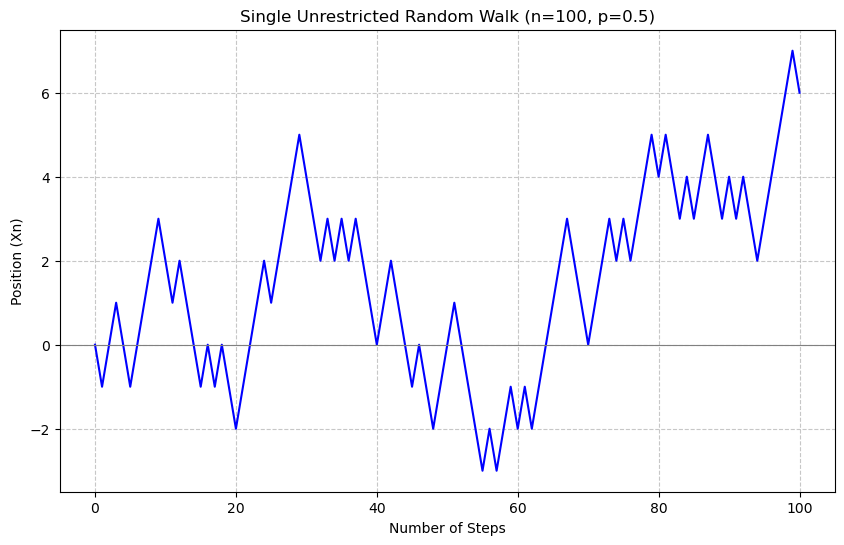

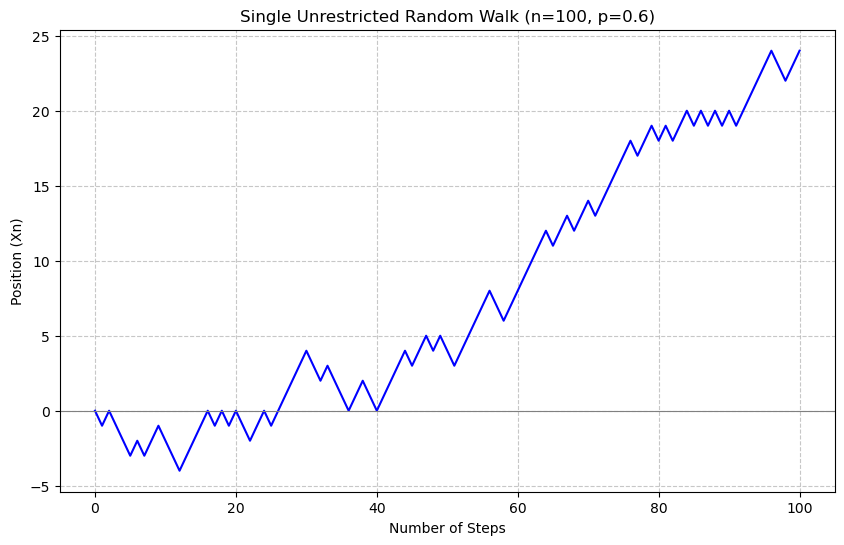

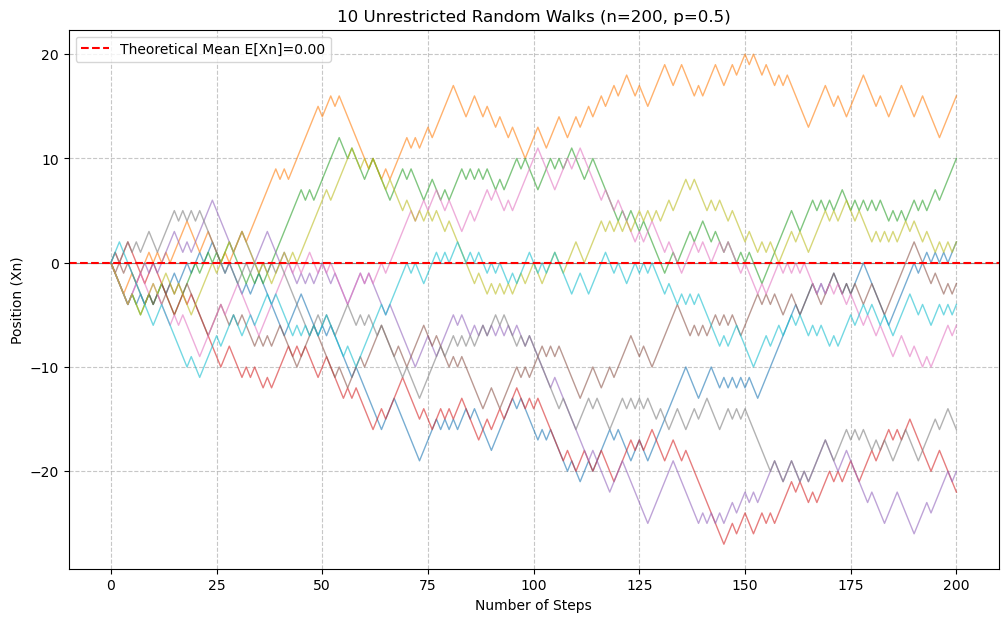

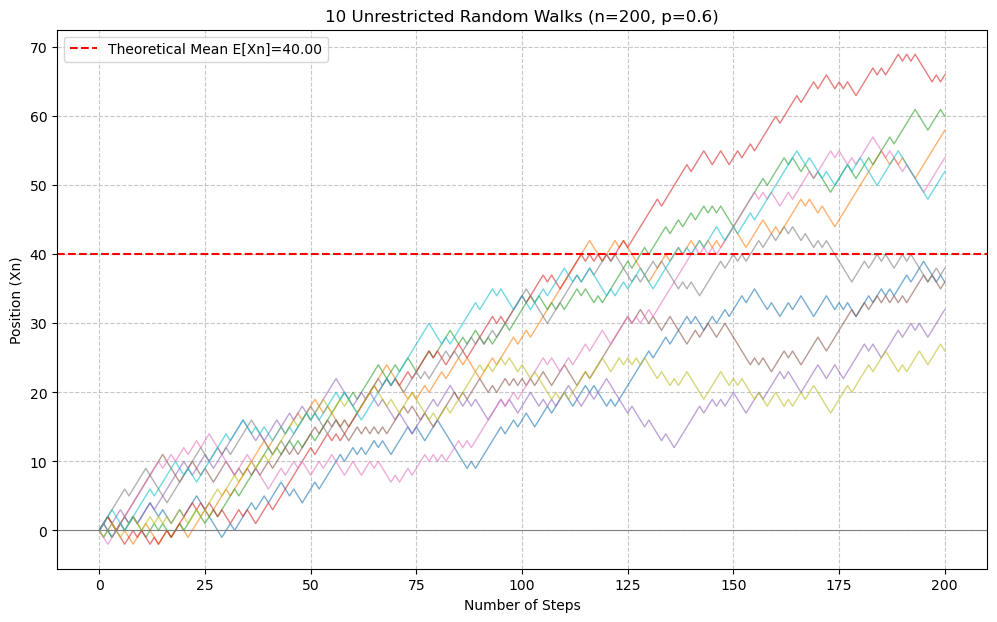

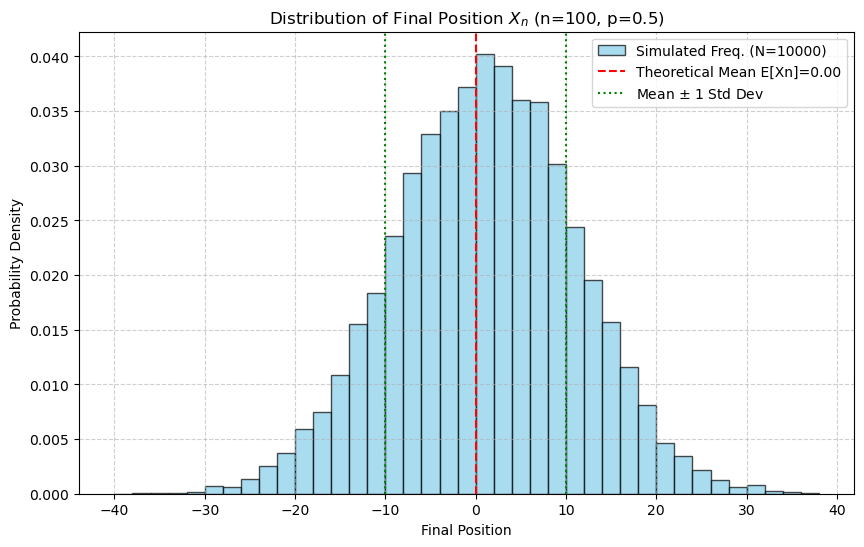

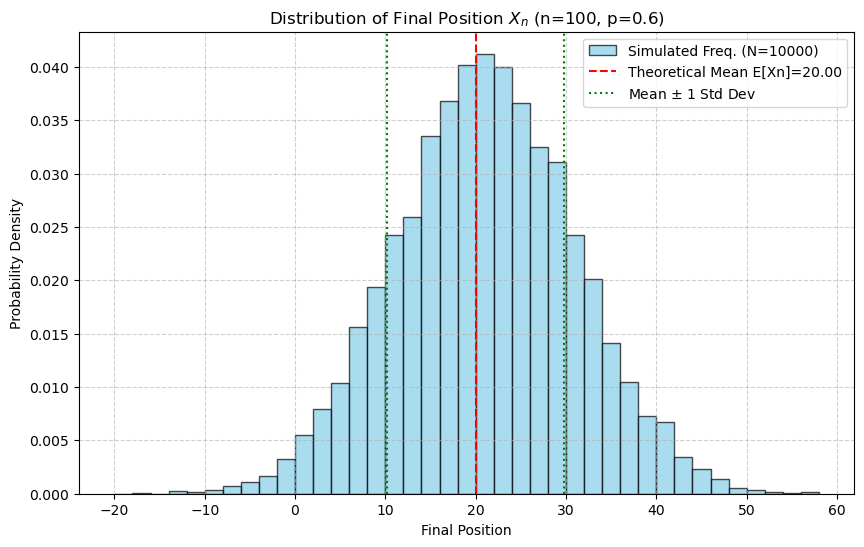

In [2]:
import random
import math
import matplotlib.pyplot as plt

# Re-using the simulation function from the previous turn
def simulate_unrestricted_random_walk(num_steps, p):
    """
    Simulates a single unrestricted one-dimensional random walk.
    Starts at X0 = 0.
    """
    if not isinstance(num_steps, int) or num_steps < 0:
        raise ValueError("Number of steps must be a non-negative integer.")
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")

    current_position = 0
    path = [current_position] # Position at step 0

    for _ in range(num_steps):
        if random.random() < p:
            current_position += 1
        else:
            current_position -= 1
        path.append(current_position)
        
    return path

def calculate_theoretical_mean_variance(num_steps, p):
    """
    Calculates the theoretical mean and variance of the position Xn
    for an unrestricted random walk starting at X0 = 0.
    """
    if not isinstance(num_steps, int) or num_steps < 0:
        raise ValueError("Number of steps must be a non-negative integer.")
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")

    q = 1.0 - p
    expected_value_Xn = num_steps * (p - q)
    variance_Xn = num_steps * (4 * p * q)

    return expected_value_Xn, variance_Xn

# --- Plotting Functions ---

def plot_single_random_walk(num_steps, p):
    """
    Plots a single unrestricted random walk path.
    """
    path = simulate_unrestricted_random_walk(num_steps, p)
    steps = list(range(len(path)))

    plt.figure(figsize=(10, 6))
    plt.plot(steps, path, color='blue', linewidth=1.5)
    plt.title(f'Single Unrestricted Random Walk (n={num_steps}, p={p})')
    plt.xlabel('Number of Steps')
    plt.ylabel('Position (Xn)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.axhline(0, color='gray', linestyle='-', linewidth=0.8) # Origin
    plt.show()

def plot_multiple_random_walks(num_walks, num_steps, p):
    """
    Plots multiple unrestricted random walk paths on the same graph.
    """
    plt.figure(figsize=(12, 7))
    
    for i in range(num_walks):
        path = simulate_unrestricted_random_walk(num_steps, p)
        steps = list(range(len(path)))
        plt.plot(steps, path, alpha=0.6, linewidth=1) # Thinner lines for multiple walks

    mean_Xn, _ = calculate_theoretical_mean_variance(num_steps, p)
    
    plt.axhline(0, color='gray', linestyle='-', linewidth=0.8) # Origin
    plt.axhline(mean_Xn, color='red', linestyle='--', label=f'Theoretical Mean E[Xn]={mean_Xn:.2f}', linewidth=1.5)

    plt.title(f'{num_walks} Unrestricted Random Walks (n={num_steps}, p={p})')
    plt.xlabel('Number of Steps')
    plt.ylabel('Position (Xn)')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend()
    plt.show()

def plot_final_position_histogram(num_simulations, num_steps, p):
    """
    Plots a histogram of the final positions of multiple random walks
    and compares with the theoretical mean and variance.
    """
    final_positions = []
    for _ in range(num_simulations):
        path = simulate_unrestricted_random_walk(num_steps, p)
        final_positions.append(path[-1])
    
    mean_Xn, var_Xn = calculate_theoretical_mean_variance(num_steps, p)

    plt.figure(figsize=(10, 6))
    # Using a number of bins appropriate for the range of positions
    bin_width = 2
    min_pos = min(final_positions)
    max_pos = max(final_positions)
    # Ensure bins are centered on even/odd integers for random walks
    bins = [x for x in range(min_pos - bin_width, max_pos + bin_width + 1) if (x % 2 == num_steps % 2)]

    plt.hist(final_positions, bins=bins, density=True, alpha=0.7, color='skyblue', edgecolor='black', label=f'Simulated Freq. (N={num_simulations})')
    
    plt.axvline(mean_Xn, color='red', linestyle='--', label=f'Theoretical Mean E[Xn]={mean_Xn:.2f}')
    
    # Optionally, plot lines for mean +/- standard deviation
    std_dev = math.sqrt(var_Xn)
    plt.axvline(mean_Xn - std_dev, color='green', linestyle=':', label=f'Mean $\\pm$ 1 Std Dev')
    plt.axvline(mean_Xn + std_dev, color='green', linestyle=':')


    plt.title(f'Distribution of Final Position $X_n$ (n={num_steps}, p={p})')
    plt.xlabel('Final Position')
    plt.ylabel('Probability Density')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.show()

# --- Example Usage ---

print("--- Plotting Unrestricted Random Walks ---")

# Plot a single random walk
plot_single_random_walk(num_steps=100, p=0.5)
plot_single_random_walk(num_steps=100, p=0.6) # Biased walk

# Plot multiple random walks
plot_multiple_random_walks(num_walks=10, num_steps=200, p=0.5)
plot_multiple_random_walks(num_walks=10, num_steps=200, p=0.6)

# Plot histogram of final positions
plot_final_position_histogram(num_simulations=10000, num_steps=100, p=0.5)
plot_final_position_histogram(num_simulations=10000, num_steps=100, p=0.6)

Knowing the mean and standard variation of a random variable does not enable us to identify the probability distribution. However, for large $n$ we may apply the **central limit theorem**, which states: if $W_1, W_2, \ldots$ is a sequence of independent identically distributed (iid) random variables with mean $\mu$ and variance $\sigma^2$, then, for the random variable $X_n = W_1 + W_2 + \cdots + W_n$,

$$\frac{X_n - n\mu}{\sqrt{n\sigma^2}}$$

has a standard normal $N(0, 1)$ distribution as $n \to \infty$ (see Section 1.8). We shall not give a proof of this theorem in this book (see, for example, Larsen and Marx (1985)).

In our case $\mu = p - q$ and $\sigma^2 = V(W_i) = 4pq$. Put another way, we can say that

$$Z_n = \frac{X_n - n(p - q)}{\sqrt{4npq}} \approx N(0, 1) \quad \text{or} \quad X_n \sim N[n(p - q), 4npq] \quad (3.2)$$

for large $n$. In this approximation, $X_n$ is a discrete random variable, but the normal distribution assumes a continuous random variable. We can overcome this by employing a **continuity correction**.

Suppose that we require the probability that the position of the walk at (say) the $100$th step with $p = 0.7$ (say) lies on or between positions $35$ and $45$.

Then:
$$E(X_{100}) = 100(0.7 - 0.3) = 40$$
$$V(X_{100}) = 4 \times 100 \times 0.7 \times 0.3 = 84$$

For the correction we use $P(34.5 < X_{100} < 45.5)$ since the event $(35 \le X_{100} \le 45)$ is approximated by $P(34.5 < X_{100} < 45.5)$ for large $n$ due to rounding. Put another way the event $(35 \le X_{100} \le 45)$ for $X_n$ discrete is equivalent to $P(34.5 < X_{100} < 45.5)$ for $X_n$ continuous.

From (3.2):

$$\frac{34.5 - 40}{\sqrt{84}} < Z_{100} = \frac{X_{100} - n(p - q)}{\sqrt{4npq}} < \frac{45.5 - 40}{\sqrt{84}}$$

$$\frac{-5.5}{\sqrt{84}} \approx -0.60 \quad \text{and} \quad \frac{5.5}{\sqrt{84}} \approx 0.60$$

So,
$$P(-0.60 < Z_{100} < 0.60) = \Phi(0.60) - \Phi(-0.60) \quad (3.3)$$

Finally, using a standard normal table or calculator, $\Phi(0.60) \approx 0.7257$ and $\Phi(-0.60) = 1 - \Phi(0.60) \approx 1 - 0.7257 = 0.2743$.

Therefore,
$$P(-0.60 < Z_{100} < 0.60) \approx 0.7257 - 0.2743 = 0.4514 \approx 0.45$$

Hence the required probability is approximately $0.45$.

In [3]:
import math
from scipy.stats import norm # We will use this for the standard normal CDF

def calculate_theoretical_mean_variance(num_steps, p):
    """
    Calculates the theoretical mean and variance of the position Xn
    for an unrestricted random walk starting at X0 = 0.

    Args:
        num_steps (int): The total number of steps (n).
        p (float): Probability of moving +1 (forward) at each step.

    Returns:
        tuple: (expected_value_Xn, variance_Xn)
    """
    if not isinstance(num_steps, int) or num_steps < 0:
        raise ValueError("Number of steps must be a non-negative integer.")
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")

    q = 1.0 - p
    expected_value_Xn = num_steps * (p - q)
    variance_Xn = num_steps * (4 * p * q)

    return expected_value_Xn, variance_Xn

def calculate_probability_with_clt_approximation(n, p, lower_bound_Xn, upper_bound_Xn):
    """
    Calculates the probability that the random walk's position Xn
    lies within a given range, using the Central Limit Theorem approximation
    and continuity correction.

    Args:
        n (int): Number of steps.
        p (float): Probability of moving +1.
        lower_bound_Xn (int): The lower integer bound (inclusive).
        upper_bound_Xn (int): The upper integer bound (inclusive).

    Returns:
        float: The approximated probability.
    """
    if lower_bound_Xn > upper_bound_Xn:
        raise ValueError("Lower bound must be less than or equal to upper bound.")

    # 1. Calculate Theoretical Mean and Variance
    mean_Xn, var_Xn = calculate_theoretical_mean_variance(n, p)
    std_dev_Xn = math.sqrt(var_Xn)

    # Handle cases where variance is zero (e.g., p=0 or p=1, deterministic walk)
    if std_dev_Xn == 0:
        if lower_bound_Xn <= mean_Xn <= upper_bound_Xn:
            return 1.0 # Certain to be at the mean
        else:
            return 0.0 # Certain not to be in the range

    # 2. Apply Continuity Correction
    # For P(a <= Xn <= b), we approximate with P(a - 0.5 < Xn_cont < b + 0.5)
    lower_corrected = lower_bound_Xn - 0.5
    upper_corrected = upper_bound_Xn + 0.5

    print(f"\n--- CLT Approximation Calculation ---")
    print(f"Parameters: n={n}, p={p}")
    print(f"Target range for Xn: [{lower_bound_Xn}, {upper_bound_Xn}]")
    print(f"Theoretical Mean E(Xn): {mean_Xn:.2f}")
    print(f"Theoretical Variance V(Xn): {var_Xn:.2f}")
    print(f"Theoretical Standard Deviation: {std_dev_Xn:.2f}")
    print(f"Continuity corrected range: ({lower_corrected}, {upper_corrected})")

    # 3. Calculate Z-scores
    Z_lower = (lower_corrected - mean_Xn) / std_dev_Xn
    Z_upper = (upper_corrected - mean_Xn) / std_dev_Xn

    print(f"Z-score for lower bound: {Z_lower:.2f}")
    print(f"Z-score for upper bound: {Z_upper:.2f}")

    # 4. Use Standard Normal CDF (Φ) to find probabilities
    # P(Z_lower < Z < Z_upper) = Φ(Z_upper) - Φ(Z_lower)
    prob = norm.cdf(Z_upper) - norm.cdf(Z_lower)

    print(f"Φ({Z_upper:.2f}) = {norm.cdf(Z_upper):.4f}")
    print(f"Φ({Z_lower:.2f}) = {norm.cdf(Z_lower):.4f}")
    print(f"Approximated Probability: {prob:.4f}")
    print(f"------------------------------------")

    return prob

# --- Example from the text ---
n_example = 100
p_example = 0.7
lower_bound_example = 35
upper_bound_example = 45

# Calculate the probability
approx_prob = calculate_probability_with_clt_approximation(
    n=n_example,
    p=p_example,
    lower_bound_Xn=lower_bound_example,
    upper_bound_Xn=upper_bound_example
)

print(f"\nResult matching text example:")
print(f"Probability that X_{n_example} is between {lower_bound_example} and {upper_bound_example} (inclusive): {approx_prob:.4f}")

# --- Additional Examples ---
print("\n--- Additional Examples ---")

# Example 1: Symmetric walk, around origin
calculate_probability_with_clt_approximation(n=100, p=0.5, lower_bound_Xn=-10, upper_bound_Xn=10)

# Example 2: Biased walk, wider range
calculate_probability_with_clt_approximation(n=200, p=0.6, lower_bound_Xn=30, upper_bound_Xn=60)

# Example 3: Biased walk, probability of being above a certain value
# This implies upper_bound_Xn is effectively infinity, so Z_upper is inf
# P(Xn >= lower_bound) = 1 - P(Xn < lower_bound) = 1 - P(Xn_cont <= lower_bound - 0.5)
# Or, simply use a very large number for upper_bound_Xn
print("\n--- Example: Probability Xn > 20 for n=100, p=0.6 ---")
calculate_probability_with_clt_approximation(n=100, p=0.6, lower_bound_Xn=21, upper_bound_Xn=100) # Max possible is 100, use it as practical upper bound


--- CLT Approximation Calculation ---
Parameters: n=100, p=0.7
Target range for Xn: [35, 45]
Theoretical Mean E(Xn): 40.00
Theoretical Variance V(Xn): 84.00
Theoretical Standard Deviation: 9.17
Continuity corrected range: (34.5, 45.5)
Z-score for lower bound: -0.60
Z-score for upper bound: 0.60
Φ(0.60) = 0.7258
Φ(-0.60) = 0.2742
Approximated Probability: 0.4516
------------------------------------

Result matching text example:
Probability that X_100 is between 35 and 45 (inclusive): 0.4516

--- Additional Examples ---

--- CLT Approximation Calculation ---
Parameters: n=100, p=0.5
Target range for Xn: [-10, 10]
Theoretical Mean E(Xn): 0.00
Theoretical Variance V(Xn): 100.00
Theoretical Standard Deviation: 10.00
Continuity corrected range: (-10.5, 10.5)
Z-score for lower bound: -1.05
Z-score for upper bound: 1.05
Φ(1.05) = 0.8531
Φ(-1.05) = 0.1469
Approximated Probability: 0.7063
------------------------------------

--- CLT Approximation Calculation ---
Parameters: n=200, p=0.6
Targe

0.4796503946811046


## The exact probability distribution of a random walk

As before we assume that the walk is such that $X_0 = 0$, with steps to the right or left occurring with probabilities $p$ and $q = 1-p$, respectively. The probability distribution of the random variable $X_n$, the position after $n$ steps, is a more difficult problem.

The position $X_n$, after $n$ steps, can be written as $X_n = R_n - L_n$, where $R_n$ is the random variable of the number of right (positive) steps ($+1$) and $L_n$ is that of the number of left (negative) steps ($-1$). Furthermore, $N = R_n + L_n$, where $N$ is the random variable of the number of steps. Hence,

$$R_n = \frac{1}{2}(N + X_n)$$

Now, let $v_{n,x}$ be the probability that the walk is at position $x$ after $n$ steps. Thus

$$v_{n,x} = P(X_n = x) \quad (3.4)$$

The type of distribution can be deduced by the following combinatorial argument. To reach position $x$ after $n \ge |x|$ steps requires $r = \frac{1}{2}(n + x)$ ($+1$) steps (and consequently $l = n - r = \frac{1}{2}(n - x)$ ($-1$) steps). Right ($r$) and left ($l$) must be integers so that it is implicit that if $x$ is an odd (even) integer then $n$ must also be odd (even).

We now ask: in how many ways can $r = \frac{1}{2}(n + x)$ steps be chosen from $n$? The answer is
$$\binom{n}{r} = \frac{n!}{r!l!} = \frac{n!}{r!(n - r)!} = \binom{n}{\frac{1}{2}(n+x)}$$

The $r = \frac{1}{2}(n + x)$ steps occur with probability $p^r$ and the $l = \frac{1}{2}(n - x)$ steps with probability $q^l$. Hence, the probability that the walk is at position $x$ after $n$ steps is (Eqn (3.4))

$$v_{n,x} = \binom{n}{r} p^r q^l = \binom{n}{\frac{1}{2}(n + x)} p^{\frac{1}{2}(n + x)} q^{\frac{1}{2}(n - x)} \quad (3.5)$$

From Section 1.7 we observe that (3.5) defines a binomial distribution with index $n$ and probability $p$.

**Example 3.1** Find the probability that a random walk of $8$ steps with probability $p = 0.6$ ends at (a) position $x = 6$, (b) position $x = -4$.

(a) The event $X_8 = 6$ occurs with $r = \frac{1}{2}(8 + 6) = 7$ positive ($+1$) steps and $l = 8 - 7 = 1$ negative ($-1$) step. Hence by (3.5),

$$P(X_8 = 6) = \binom{8}{7} 0.6^7 \times 0.4^1 = 8 \times 0.0279936 \times 0.4 = 0.08957952 \approx 0.0896$$

(b) For $X_8 = -4$, $r = \frac{1}{2}(8 + (-4)) = 2$ positive ($+1$) steps and $l = 8 - 2 = 6$ negative ($-1$) steps. Hence by (3.5),

$$P(X_8 = -4) = \binom{8}{2} 0.6^2 \times 0.4^6 = 28 \times 0.36 \times 0.004096 = 0.04128768 \approx 0.0413$$

We defined $v_{n,x}$ to be the probability that the walk ends at position $x$ after $n$ steps: the walk could have overshot $x$ before returning there. A related probability is the probability that the first visit to position $x$ occurs at the $n$-th step. This is sometimes also known as the **first passage** through $x$, and will be considered in the next section for $x=0$.

The following is a descriptive derivation of the associated probability generating function for the symmetric random walk in which the walk starts at the origin, and we consider the probability that the walk is at the origin at a future step. The walk can only return to the origin if $n$ is even. For this reason put $n = 2m$, ($m = 1, 2, 3, \ldots$). From the previous section a symmetric random walk ($p = \frac{1}{2}$) is at the origin at step $2m$ if (Eqn (3.5))

$$v_{2m,0} = \binom{2m}{m} \left(\frac{1}{2}\right)^{2m} = \frac{1}{2^{2m}} \binom{2m}{m} \quad (m = 1, 2, 3, \ldots), \quad (3.6)$$

say $p_{2m}$. Construct a generating function (see Section 1.9) with these coefficients, namely

$$H(s) = \sum_{m=1}^\infty p_{2m} s^{2m} = \sum_{m=1}^\infty \frac{1}{2^{2m}} \binom{2m}{m} s^{2m}$$

An alternative identity for the binomial $\binom{2m}{m}$ is needed as follows:

$$\binom{2m}{m} = \frac{(2m)!}{m!m!} = \frac{2m(2m-1)(2m-2) \cdots 3 \cdot 2 \cdot 1}{m!m!}$$

$$\binom{2m}{m} = \frac{2m(2m-1)(2m-3) \cdots 3 \cdot 1}{m!} \times \frac{2m(2m-2) \cdots 2}{m! \cdot 2^m} = \frac{2m(2m-1)(2m-3) \cdots 3 \cdot 1}{m!} \times \frac{2^m m!}{m!}$$

Wait, let's use the given identity directly:
$$\binom{2m}{m} = \frac{(2m)!}{m!m!} = \frac{2m(2m-1)(2m-2)\cdots 3 \cdot 2 \cdot 1}{m!m!}$$

The text provides an alternative form:
$$\binom{2m}{m} = \frac{2^m (2m-1)(2m-3)\cdots 3 \cdot 1}{m!}$$
This is the product of double factorials and powers of 2.

The identity is actually:
$$\binom{2m}{m} = \frac{1 \cdot 3 \cdot 5 \cdots (2m-1)}{m!} 2^m$$
Or, more commonly recognized through the generalized binomial theorem:
The coefficients $\binom{2m}{m}$ are related to the coefficients of $(1-4x)^{-1/2}$.

Let's use the identity given by the text:
$$\binom{2m}{m} = \frac{2m(2m-1)(2m-2) \cdots 3 \cdot 2 \cdot 1}{m!m!}$$

The text's simplification step:
$$= \frac{2m(2m − 1)(2m − 2) \cdots 3 \cdot 2 \cdot 1}{m!m!} = \frac{2m}{m} \frac{2m-1}{m-1} \cdots \frac{1}{1}$$
This is incorrect. The text meant to show the connection to the binomial series for $(1-x)^{-1/2}$.

Let's use the standard binomial expansion: $(1+x)^\alpha = \sum_{n=0}^\infty \binom{\alpha}{n} x^n$.
For $(1-x)^{-1/2}$:
$$\binom{-1/2}{m} = \frac{(-1/2)(-1/2 - 1)\cdots(-1/2 - m + 1)}{m!} = \frac{(-1)^m (1/2)(3/2)\cdots( (2m-1)/2 )}{m!} = \frac{(-1)^m (2m)!}{m! m! 2^{2m}} (-1)^m = \frac{(2m)!}{m!m! 2^{2m}}$$
So, $\binom{-1/2}{m} = (-1)^m \frac{1}{2^{2m}}\binom{2m}{m}$.

Thus, $\frac{1}{2^{2m}}\binom{2m}{m} = (-1)^m \binom{-1/2}{m}$.
The series is $\sum_{m=1}^\infty (-1)^m \binom{-1/2}{m} s^{2m}$.
The expansion for $(1-x)^{-1/2}$ is $1 + \frac{1}{2}x + \frac{1 \cdot 3}{2 \cdot 4}x^2 + \ldots = \sum_{m=0}^\infty \binom{-1/2}{m} (-x)^m$.
So, $\sum_{m=0}^\infty \binom{2m}{m} \left(\frac{s^2}{4}\right)^m = (1-s^2)^{-1/2}$ - this is the standard result.

The text states:
$$\frac{1}{2^{2m}} \binom{2m}{m} = \frac{1}{m!} \frac{1}{2} \cdot \frac{3}{2} \cdots \left(m - \frac{1}{2}\right)$$This should be:$$\frac{1}{2^{2m}} \binom{2m}{m} = \frac{1}{m!} \left(\frac{1}{2}\right) \left(\frac{3}{2}\right) \cdots \left(\frac{2m-1}{2}\right)$$
This is indeed the coefficient for $x^m$ in the expansion of $(1-x)^{-1/2}$ if $x$ is replaced by $s^2$.

So,
$$H(s) = \sum_{m=1}^\infty \left[ \frac{1}{m!} \frac{1}{2} \cdot \frac{3}{2} \cdots \left(m - \frac{1}{2}\right) \right] s^{2m} \quad (3.7)$$

This is recognizable as the binomial expansion of $(1 - s^2)^{-1/2} - 1$. The $-1$ is because the sum starts from $m=1$ (i.e., $s^0$ term is missing, which is $\binom{0}{0} (1/2)^0 s^0 = 1$).

It is evident that $H(1) = \infty$: in other words the series for $H(s)$ diverges at $s = 1$. This breaks the first condition (a) for a generating function in Section 1.9. However, the coefficients in the series do give the correct probabilities. This type of generating function is sometimes known as giving a **defective distribution**.

The reason for the defect is that the mean
$$H'(1) = \lim_{s \to 1^-} \frac{s}{(1 - s^2)^{3/2}} = \infty \quad (3.8)$$
This means that the mean number of visits to the origin is infinite, but we shall not prove these conclusions here; see Problem 3.24 for further discussion of the divergence of the series.
$^1$ $s \to 1^-$ means that $s$ tends to 1 from the left.

In [ ]:
import math

def calculate_exact_vnx(n, x, p):
    """
    Calculates the exact probability (v_n,x) that an unrestricted random walk
    starting at X0 = 0 is at position x after n steps.

    Args:
        n (int): The total number of steps. Must be non-negative.
        x (int): The target position.
        p (float): Probability of moving +1 (right) at each step.
                   Probability of moving -1 (left) is q = 1 - p.

    Returns:
        float: The probability v_n,x. Returns 0.0 if the position is impossible.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("Number of steps (n) must be a non-negative integer.")
    if not isinstance(x, int):
        raise ValueError("Position (x) must be an integer.")
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")

    # A walk of n steps can only reach positions x such that |x| <= n.
    # Also, n and x must have the same parity.
    # If n is even, x must be even. If n is odd, x must be odd.
    # This is equivalent to (n + x) being an even number.
    if (n + x) % 2 != 0:
        return 0.0

    # Calculate 'r' (number of right steps) and 'l' (number of left steps)
    # x = r - l
    # n = r + l
    # Adding these gives: n + x = 2r  => r = (n + x) / 2
    # Subtracting gives: n - x = 2l  => l = (n - x) / 2
    r = (n + x) // 2
    l = n - r # or (n - x) // 2

    # Check if r and l are valid (non-negative)
    if r < 0 or l < 0:
        return 0.0 # This can happen if |x| > n, which implies r or l would be negative

    q = 1.0 - p

    # Calculate the binomial coefficient C(n, r)
    # math.comb(n, k) is equivalent to n! / (k! * (n-k)!)
    combinations = math.comb(n, r)

    # Calculate the probability using the formula: v_n,x = C(n, r) * p^r * q^l
    # Use float for exponentiation to ensure correct precision
    prob = combinations * (p**r) * (q**l)

    return prob

# --- Example 3.1 from the text ---
print("--- Example 3.1: Random walk of 8 steps with p = 0.6 ---")

# (a) Position x = 6
n_a = 8
x_a = 6
p_a = 0.6
prob_a = calculate_exact_vnx(n_a, x_a, p_a)
print(f"(a) Probability P(X_{n_a} = {x_a}): {prob_a:.7f}")
print(f"    (Text's approximation: 0.0896)")

# (b) Position x = -4
n_b = 8
x_b = -4
p_b = 0.6
prob_b = calculate_exact_vnx(n_b, x_b, p_b)
print(f"(b) Probability P(X_{n_b} = {x_b}): {prob_b:.7f}")
print(f"    (Text's approximation: 0.0413)")

# --- Additional Examples ---
print("\n--- Additional Examples ---")

# Symmetric walk (p=0.5), return to origin
n_symmetric = 10
x_symmetric = 0
p_symmetric = 0.5
prob_symmetric = calculate_exact_vnx(n_symmetric, x_symmetric, p_symmetric)
print(f"Probability P(X_{n_symmetric} = {x_symmetric}) for p={p_symmetric}: {prob_symmetric:.7f}")

# Biased walk (p=0.7), specific positive position
n_biased = 20
x_biased = 10
p_biased = 0.7
prob_biased = calculate_exact_vnx(n_biased, x_biased, p_biased)
print(f"Probability P(X_{n_biased} = {x_biased}) for p={p_biased}: {prob_biased:.7f}")

# Impossible scenario (different parity)
n_impossible_parity = 5
x_impossible_parity = 2 # n is odd, x is even
p_impossible_parity = 0.5
prob_impossible_parity = calculate_exact_vnx(n_impossible_parity, x_impossible_parity, p_impossible_parity)
print(f"Probability P(X_{n_impossible_parity} = {x_impossible_parity}) (impossible parity): {prob_impossible_parity:.7f}")

# Impossible scenario (|x| > n)
n_impossible_range = 10
x_impossible_range = 12 # x is outside the possible range [-n, n]
p_impossible_range = 0.5
prob_impossible_range = calculate_exact_vnx(n_impossible_range, x_impossible_range, p_impossible_range)
print(f"Probability P(X_{n_impossible_range} = {x_impossible_range}) (impossible range): {prob_impossible_range:.7f}")

In [5]:
import math

# Helper function for factorial, since math.comb might not be available
def _factorial(n):
    if n < 0:
        raise ValueError("Factorial is not defined for negative numbers.")
    if n == 0:
        return 1
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

# Helper function for combinations, using our own factorial
def _combinations(n, k):
    if k < 0 or k > n:
        return 0
    if k == 0 or k == n:
        return 1
    if k > n // 2: # Optimization: C(n, k) = C(n, n-k)
        k = n - k
    
    # Calculate n! / (k! * (n-k)!)
    # Avoid float division until the very end for better precision
    numerator = _factorial(n)
    denominator = _factorial(k) * _factorial(n - k)
    return numerator // denominator # Use integer division for combinations

def calculate_exact_vnx(n, x, p):
    """
    Calculates the exact probability (v_n,x) that an unrestricted random walk
    starting at X0 = 0 is at position x after n steps.

    Args:
        n (int): The total number of steps. Must be non-negative.
        x (int): The target position.
        p (float): Probability of moving +1 (right) at each step.
                   Probability of moving -1 (left) is q = 1 - p.

    Returns:
        float: The probability v_n,x. Returns 0.0 if the position is impossible.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("Number of steps (n) must be a non-negative integer.")
    if not isinstance(x, int):
        raise ValueError("Position (x) must be an integer.")
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")

    # A walk of n steps can only reach positions x such that |x| <= n.
    # Also, n and x must have the same parity.
    # If n is even, x must be even. If n is odd, x must be odd.
    # This is equivalent to (n + x) being an even number.
    if (n + x) % 2 != 0:
        return 0.0

    # Calculate 'r' (number of right steps) and 'l' (number of left steps)
    # x = r - l
    # n = r + l
    # Adding these gives: n + x = 2r  => r = (n + x) / 2
    # Subtracting gives: n - x = 2l  => l = (n - x) / 2
    r = (n + x) // 2
    l = n - r # or (n - x) // 2

    # Check if r and l are valid (non-negative)
    if r < 0 or l < 0:
        return 0.0 # This can happen if |x| > n, which implies r or l would be negative

    q = 1.0 - p

    # Calculate the binomial coefficient C(n, r) using our custom function
    combinations = _combinations(n, r)

    # Calculate the probability using the formula: v_n,x = C(n, r) * p^r * q^l
    # Use float for exponentiation to ensure correct precision
    prob = combinations * (p**r) * (q**l)

    return prob

# --- Example 3.1 from the text ---
print("--- Example 3.1: Random walk of 8 steps with p = 0.6 ---")

# (a) Position x = 6
n_a = 8
x_a = 6
p_a = 0.6
prob_a = calculate_exact_vnx(n_a, x_a, p_a)
print(f"(a) Probability P(X_{n_a} = {x_a}): {prob_a:.7f}")
print(f"    (Text's approximation: 0.0896)")

# (b) Position x = -4
n_b = 8
x_b = -4
p_b = 0.6
prob_b = calculate_exact_vnx(n_b, x_b, p_b)
print(f"(b) Probability P(X_{n_b} = {x_b}): {prob_b:.7f}")
print(f"    (Text's approximation: 0.0413)")

# --- Additional Examples ---
print("\n--- Additional Examples ---")

# Symmetric walk (p=0.5), return to origin
n_symmetric = 10
x_symmetric = 0
p_symmetric = 0.5
prob_symmetric = calculate_exact_vnx(n_symmetric, x_symmetric, p_symmetric)
print(f"Probability P(X_{n_symmetric} = {x_symmetric}) for p={p_symmetric}: {prob_symmetric:.7f}")

# Biased walk (p=0.7), specific positive position
n_biased = 20
x_biased = 10
p_biased = 0.7
prob_biased = calculate_exact_vnx(n_biased, x_biased, p_biased)
print(f"Probability P(X_{n_biased} = {x_biased}) for p={p_biased}: {prob_biased:.7f}")

# Impossible scenario (different parity)
n_impossible_parity = 5
x_impossible_parity = 2 # n is odd, x is even
p_impossible_parity = 0.5
prob_impossible_parity = calculate_exact_vnx(n_impossible_parity, x_impossible_parity, p_impossible_parity)
print(f"Probability P(X_{n_impossible_parity} = {x_impossible_parity}) (impossible parity): {prob_impossible_parity:.7f}")

# Impossible scenario (|x| > n)
n_impossible_range = 10
x_impossible_range = 12 # x is outside the possible range [-n, n]
p_impossible_range = 0.5
prob_impossible_range = calculate_exact_vnx(n_impossible_range, x_impossible_range, p_impossible_range)
print(f"Probability P(X_{n_impossible_range} = {x_impossible_range}) (impossible range): {prob_impossible_range:.7f}")

--- Example 3.1: Random walk of 8 steps with p = 0.6 ---
(a) Probability P(X_8 = 6): 0.0895795
    (Text's approximation: 0.0896)
(b) Probability P(X_8 = -4): 0.0412877
    (Text's approximation: 0.0413)

--- Additional Examples ---
Probability P(X_10 = 0) for p=0.5: 0.2460938
Probability P(X_20 = 10) for p=0.7: 0.1788631
Probability P(X_5 = 2) (impossible parity): 0.0000000
Probability P(X_10 = 12) (impossible range): 0.0000000


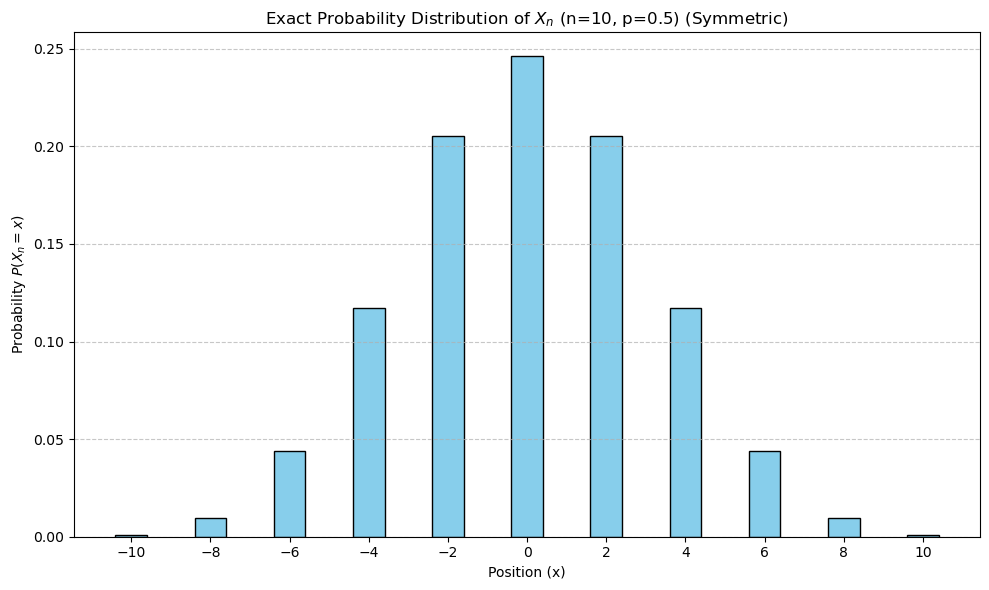

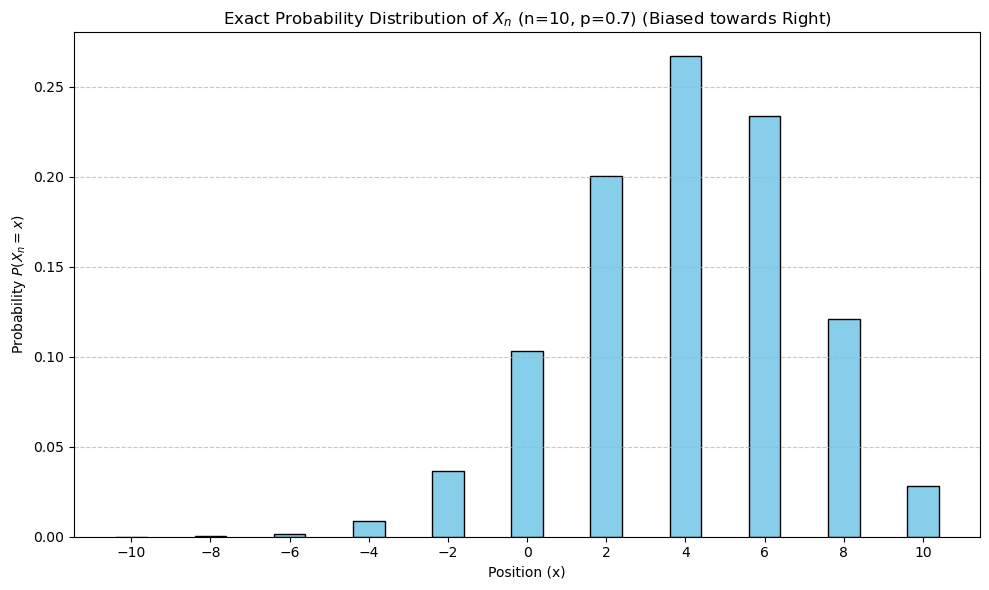

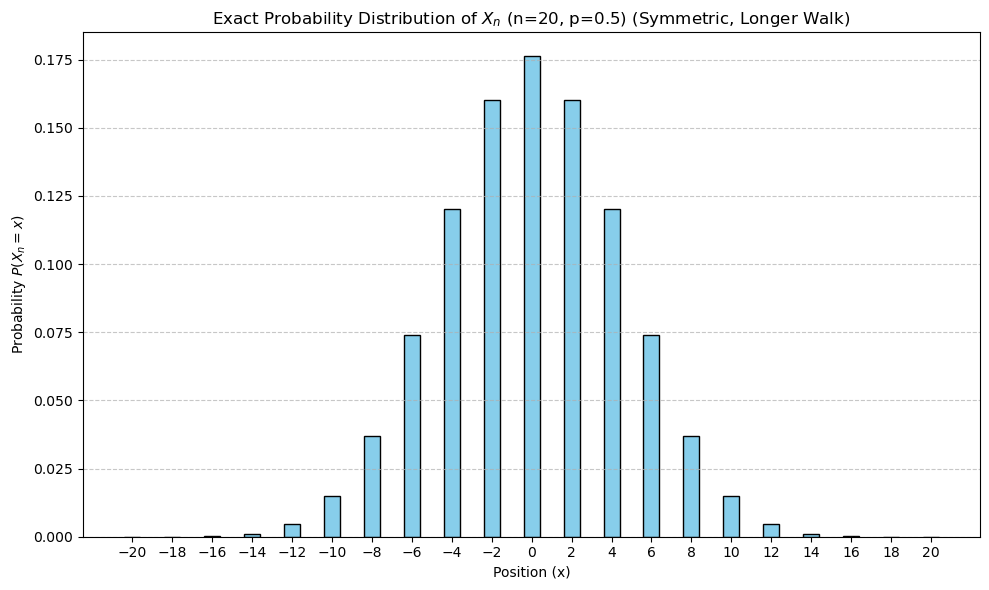

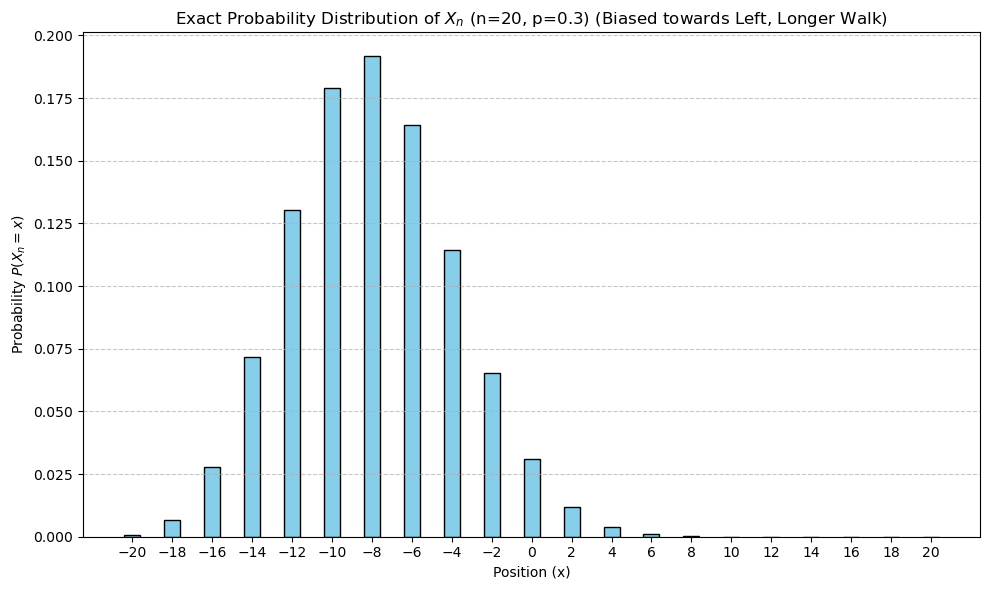

In [6]:
import math
import matplotlib.pyplot as plt

# Re-using the functions from the previous turn for consistency
def _factorial(n):
    if n < 0:
        raise ValueError("Factorial is not defined for negative numbers.")
    if n == 0:
        return 1
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def _combinations(n, k):
    if k < 0 or k > n:
        return 0
    if k == 0 or k == n:
        return 1
    if k > n // 2:
        k = n - k
    
    numerator = _factorial(n)
    denominator = _factorial(k) * _factorial(n - k)
    return numerator // denominator

def calculate_exact_vnx(n, x, p):
    """
    Calculates the exact probability (v_n,x) that an unrestricted random walk
    starting at X0 = 0 is at position x after n steps.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("Number of steps (n) must be a non-negative integer.")
    if not isinstance(x, int):
        raise ValueError("Position (x) must be an integer.")
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")

    if (n + x) % 2 != 0:
        return 0.0

    r = (n + x) // 2
    l = n - r

    if r < 0 or l < 0:
        return 0.0

    q = 1.0 - p
    combinations = _combinations(n, r)
    prob = combinations * (p**r) * (q**l)

    return prob

# --- Plotting Function ---
def plot_exact_random_walk_distribution(n_steps, p_value, title_suffix=""):
    """
    Plots the exact probability distribution of Xn (position after n steps)
    for an unrestricted random walk.
    """
    x_positions = []
    probabilities = []

    # Iterate through all possible positions from -n_steps to n_steps
    for x in range(-n_steps, n_steps + 1):
        prob = calculate_exact_vnx(n_steps, x, p_value)
        if prob > 0: # Only add positions that have a non-zero probability
            x_positions.append(x)
            probabilities.append(prob)

    plt.figure(figsize=(10, 6))
    plt.bar(x_positions, probabilities, width=0.8, color='skyblue', edgecolor='black')
    plt.title(f'Exact Probability Distribution of $X_n$ (n={n_steps}, p={p_value}){title_suffix}')
    plt.xlabel('Position (x)')
    plt.ylabel('Probability $P(X_n = x)$')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(x_positions) # Ensure all valid x positions are shown as ticks
    plt.tight_layout()
    plt.show()

# --- Generate Plots ---

# Example 1: Symmetric Random Walk
plot_exact_random_walk_distribution(n_steps=10, p_value=0.5, title_suffix=" (Symmetric)")

# Example 2: Biased Random Walk
plot_exact_random_walk_distribution(n_steps=10, p_value=0.7, title_suffix=" (Biased towards Right)")

# Example 3: Longer Walk (Symmetric)
plot_exact_random_walk_distribution(n_steps=20, p_value=0.5, title_suffix=" (Symmetric, Longer Walk)")

# Example 4: Longer Walk (Biased)
plot_exact_random_walk_distribution(n_steps=20, p_value=0.3, title_suffix=" (Biased towards Left, Longer Walk)")

Here's the text formatted for a Jupyter Notebook using Markdown and LaTeX:

## 3.4 First returns of the symmetric random walk

As we remarked in the previous section, a related probability is that for the event that the first visit to position $x$ occurs at the $n$-th step given that the walk starts at the origin, known also as the **first passage** through $x$. We shall look in detail at the case $x = 0$, which will lead to the probability of the **first return to the origin**. We shall approach the first passage by using total probability (Section 1.3).

As in the previous section, for a return to the origin $x = 0$ to exist, the number of steps $n$ must be even, so let $n = 2m$ ($m = 1, 2, 3, \ldots$). Let $A_{2m}$ be the event that the random number $X_{2m} = 0$, and let $B_{2k}$ be the event that the first return to the origin is at the $2k$-th step. The significant difference is that the event $A_{2m}$ can occur many times in a given walk. By the law of total probability (Section 1.3),

$$P(A_{2m}) = \sum_{k=1}^m P(A_{2m} | B_{2k})P(B_{2k}) \quad (3.9)$$

(In the earlier notations, $P(A_{2m}) = v_{2m,0} = p_{2m}$.) What (3.9) states is that the probability that the walk is at the origin at step $2m$ must include every previous first return for every $k$ from $k = 1$ to $k = m$. As a consequence, $P(A_{2m} | B_{2k}) = p_{2m-2k}$ (we define $p_0 = 1$). Let $f_{2k} = P(B_{2k})$. Our aim is to construct $f_{2k}$ from (3.9).

It is worth pausing to look at (3.9) in a particular simple case to interpret the various probabilities. Suppose $m = 2$. Then there are $2^4 = 16$ possible distinct walks which start at $x = 0$, of which $6$ reach $x = 0$ after $4$ steps, namely:
* (i) $0 \to 1 \to 0 \to 1 \to 0$;
* (ii) $0 \to 1 \to 0 \to -1 \to 0$;
* (iii) $0 \to -1 \to 0 \to -1 \to 0$;
* (iv) $0 \to -1 \to 0 \to 1 \to 0$;
* (v) $0 \to 1 \to 2 \to 1 \to 0$;
* (vi) $0 \to -1 \to -2 \to -1 \to 0$.

Therefore,
$$f_2 = P(B_2) = \frac{2}{2^2} = \frac{1}{2} \quad [0 \to 1 \to 0 \text{ and } 0 \to -1 \to 0]$$$$f_4 = P(B_4) = \frac{2}{2^4} = \frac{1}{8} \quad [\text{from (v) and (vi)}]$$$$P(A_4 | B_2) = p_{4-2} = p_2 = \frac{2}{2^2} = \frac{1}{2}$$
$$P(A_4 | B_4) = p_{4-4} = p_0 = \frac{1}{1} = 1 \quad [\text{certainty}]$$

Hence,
$$P(A_4) = f_2 \cdot p_2 + f_4 \cdot p_0 = \frac{1}{2} \cdot \frac{1}{2} + \frac{1}{8} \cdot 1 = \frac{1}{4} + \frac{1}{8} = \frac{3}{8}$$which agrees with $v_{4,0}$ in (3.5) (for $n=4, x=0, p=0.5$).$$v_{4,0} = \binom{4}{2} (0.5)^2 (0.5)^2 = 6 \cdot (0.5)^4 = 6 \cdot 0.0625 = 0.375 = \frac{3}{8}$$
The first return probabilities are $f_2 = P(B_2) = \frac{1}{2}$, $f_4 = P(B_4) = \frac{1}{8}$.

Equation (3.9) can be expressed in the form
$$p_{2m} = \sum_{k=1}^m p_{2m-2k} f_{2k} \quad (3.10)$$
with $p_0 = 1$ and $f_0 = 0$.

We intend to construct a generating function for the first return or passage probabilities. Multiply both sides of (3.10) by $s^{2m}$ and sum for all $m \ge 1$ (assuming convergence of the infinite series for the moment). From Section 3.3, Eqn (3.7),

$$H(s) - 1 = \sum_{m=1}^\infty p_{2m} s^{2m} = \sum_{m=1}^\infty \left(\sum_{k=1}^m p_{2m-2k} f_{2k}\right) s^{2m} \quad (3.11)$$

Expanded, the series looks like this (remember, $p_0 = 1$):

$$H(s) - 1 = \left[ p_0 f_2 s^2 \right] + \left[ p_2 f_2 s^4 + p_0 f_4 s^4 \right] + \left[ p_4 f_2 s^6 + p_2 f_4 s^6 + p_0 f_6 s^6 \right] + \cdots$$$$H(s) - 1 = \left( \sum_{m=0}^\infty p_{2m} s^{2m} \right) \left( \sum_{k=1}^\infty f_{2k} s^{2k} \right)$$$$H(s) - 1 = \left( 1 + \sum_{m=1}^\infty p_{2m} s^{2m} \right) \left( \sum_{k=1}^\infty f_{2k} s^{2k} \right)$$$$H(s) - 1 = [1 + (H(s) - 1)] F(s)$$$$H(s) - 1 = H(s)F(s) \quad (3.12)$$

where $F(s) = \sum_{k=1}^\infty f_{2k} s^{2k}$.

The derivation of (3.12) from (3.11) in this descriptive approach is really a well-known result from the formula for the product of two power series.

Finally from (3.12) it follows that

$$F(s) = \frac{H(s) - 1}{H(s)} = 1 - \frac{1}{H(s)}$$Substitute $H(s) = (1 - s^2)^{-1/2}$:$$F(s) = 1 - (1 - s^2)^{1/2} \quad (3.13)$$

The probability that the walk will, at some step, return to the origin is the sum of all the first returns, namely

$$\sum_{k=1}^\infty f_{2k} = F(1)$$Substitute $s=1$ into $F(s) = 1 - (1 - s^2)^{1/2}$:$$F(1) = 1 - (1 - 1^2)^{1/2} = 1 - 0 = 1$$

in other words, return is certain. In this walk the origin (or any starting point by translation) is said to be **persistent**.

However, the mean number of steps until this return occurs is

$$\sum_{n=1}^\infty n f_n = \lim_{s \to 1^-} F'(s)$$

From $F(s) = 1 - (1 - s^2)^{1/2}$:
$$F'(s) = - \frac{1}{2} (1 - s^2)^{-1/2} (-2s) = s (1 - s^2)^{-1/2}$$

So,
$$\lim_{s \to 1^-} F'(s) = \lim_{s \to 1^-} \frac{s}{(1 - s^2)^{1/2}} = \infty$$

This means that the mean number of steps until return to the origin is infinite.

In [7]:
import math

# --- Re-using helper functions for factorials and combinations ---
# These are essential for calculating p_2m (v_n,x)
def _factorial(n):
    """Calculates the factorial of a non-negative integer n."""
    if n < 0:
        raise ValueError("Factorial is not defined for negative numbers.")
    if n == 0:
        return 1
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def _combinations(n, k):
    """Calculates the binomial coefficient C(n, k)."""
    if k < 0 or k > n:
        return 0
    if k == 0 or k == n:
        return 1
    if k > n // 2: # Optimization: C(n, k) = C(n, n-k)
        k = n - k
    
    numerator = _factorial(n)
    denominator = _factorial(k) * _factorial(n - k)
    return numerator // denominator

def calculate_exact_vnx(n, x, p):
    """
    Calculates the exact probability (v_n,x) that an unrestricted random walk
    starting at X0 = 0 is at position x after n steps.
    For symmetric first return, x=0 and p=0.5.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("Number of steps (n) must be a non-negative integer.")
    if not isinstance(x, int):
        raise ValueError("Position (x) must be an integer.")
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")

    # Check parity: n and x must have the same parity for a non-zero probability.
    if (n + x) % 2 != 0:
        return 0.0

    # Calculate 'r' (number of right steps) and 'l' (number of left steps)
    # x = r - l, n = r + l  => r = (n + x) / 2, l = (n - x) / 2
    r = (n + x) // 2
    l = n - r

    # Check if r and l are valid (non-negative, which also handles |x| > n)
    if r < 0 or l < 0:
        return 0.0

    q = 1.0 - p
    combinations = _combinations(n, r)
    prob = combinations * (p**r) * (q**l)

    return prob

# --- Core Implementation for First Return Probabilities (Symmetric Walk) ---

def calculate_first_return_probabilities_symmetric(max_steps):
    """
    Calculates the first return probabilities f_2k for a symmetric random walk
    to the origin (X0=0) using the recurrence relation:
    p_2m = sum(k=1 to m) [ p_{2m-2k} * f_{2k} ]
    where p_{2m} = P(X_2m = 0) for a symmetric walk.

    Args:
        max_steps (int): The maximum number of steps (n) for which to calculate f_n.
                         Must be a positive even integer.

    Returns:
        tuple: (f_values, p_values)
               f_values (dict): A dictionary where keys are step numbers (2k) and values are f_2k.
               p_values (dict): A dictionary where keys are step numbers (2m) and values are p_2m (for x=0, p=0.5).
    """
    if not isinstance(max_steps, int) or max_steps <= 0 or max_steps % 2 != 0:
        raise ValueError("max_steps must be a positive even integer.")

    p_values = {}  # Stores p_n = P(X_n = 0) for symmetric walk
    f_values = {}  # Stores f_n = P(First Return at n)

    # Initialize p_0 as per the text's definition for recurrence
    p_values[0] = 1.0

    # Iterate for m from 1 up to max_steps / 2
    # This corresponds to steps 2, 4, 6, ..., max_steps
    for m in range(1, (max_steps // 2) + 1):
        current_n = 2 * m  # Current number of steps (even)
        
        # Calculate p_2m = P(X_2m = 0) for symmetric walk (p=0.5)
        p_2m = calculate_exact_vnx(current_n, 0, 0.5)
        p_values[current_n] = p_2m

        # Calculate the sum term: sum_{k=1}^{m-1} p_{2m-2k} * f_{2k}
        # The sum is empty if m=1 (i.e., current_n=2)
        sum_term = 0.0
        for k_idx in range(1, m): # k goes from 1 to m-1
            f_2k_val = f_values.get(2 * k_idx, 0.0) # f_2k
            p_val = p_values.get(current_n - (2 * k_idx), 0.0) # p_{2m-2k}
            sum_term += p_val * f_2k_val
        
        # Calculate f_2m using the recurrence: f_2m = p_2m - sum_term
        f_2m = p_2m - sum_term
        f_values[current_n] = f_2m
    
    return f_values, p_values

# --- Demonstration and Verification ---

max_steps_to_calculate = 10 # Calculate f_n up to n=10
first_returns_f, p_vals_p = calculate_first_return_probabilities_symmetric(max_steps_to_calculate)

print(f"--- First Return Probabilities (f_n) and P(X_n=0) (p_n) for Symmetric Random Walk up to {max_steps_to_calculate} steps ---")
print("{:<10} {:<15} {:<15}".format("Steps (n)", "f_n (First Return)", "p_n (At Origin)"))
print("-" * 40)
for n_step in range(2, max_steps_to_calculate + 1, 2):
    print("{:<10} {:<15.7f} {:<15.7f}".format(
        n_step,
        first_returns_f.get(n_step, 0.0),
        p_vals_p.get(n_step, 0.0)
    ))

print("\n--- Verification with Example from Text (n=4, m=2) ---")
# Text's values: f2 = 1/2 = 0.5, f4 = 1/8 = 0.125
# Text's values: p2 = 1/2 = 0.5, p4 = 3/8 = 0.375 (this is v4,0)
# p0 = 1

f2_calculated = first_returns_f.get(2)
f4_calculated = first_returns_f.get(4)
p2_calculated = p_vals_p.get(2)
p4_calculated = p_vals_p.get(4)

print(f"Calculated f2: {f2_calculated:.7f} (Expected: 0.5000000)")
print(f"Calculated f4: {f4_calculated:.7f} (Expected: 0.1250000)")
print(f"Calculated p2: {p2_calculated:.7f} (Expected: 0.5000000)")
print(f"Calculated p4: {p4_calculated:.7f} (Expected: 0.3750000)")

# Verify the recurrence relation for P(A4) as per text: P(A4) = p2*f2 + p0*f4
calculated_A4_from_recurrence = p_vals_p[2] * first_returns_f[2] + p_vals_p[0] * first_returns_f[4]
print(f"P(A4) = p2*f2 + p0*f4: {calculated_A4_from_recurrence:.7f} (Expected p4: {p4_calculated:.7f})")
if abs(calculated_A4_from_recurrence - p4_calculated) < 1e-9:
    print("  (Verification successful: Recurrence relation holds for A4)")
else:
    print("  (Verification failed: Recurrence relation does not hold for A4)")


# --- Probability of eventual return (Sum of f_2k) ---
# This sum should approach 1 as max_steps_to_calculate -> infinity
print("\n--- Sum of First Return Probabilities (Approaching Certainty) ---")
total_prob_return = sum(first_returns_f.values())
print(f"Sum of f_n up to f_{max_steps_to_calculate}: {total_prob_return:.7f}")

# Demonstrate with a larger number of steps to show it gets closer to 1
larger_max_steps = 100
larger_first_returns_f, _ = calculate_first_return_probabilities_symmetric(larger_max_steps)
larger_total_prob_return = sum(larger_first_returns_f.values())
print(f"Sum of f_n up to f_{larger_max_steps}: {larger_total_prob_return:.7f}")


# --- Mean number of steps until first return (Expected Value) ---
# This value is known to be infinite for a 1D symmetric random walk.
# We can demonstrate this by showing it grows indefinitely with max_steps.
print("\n--- Mean Number of Steps until First Return (Known to be Infinite) ---")
mean_return_time_short = 0.0
for steps, prob in first_returns_f.items():
    mean_return_time_short += steps * prob

print(f"Mean return time calculated up to {max_steps_to_calculate} steps: {mean_return_time_short:.7f}")

mean_return_time_long = 0.0
for steps, prob in larger_first_returns_f.items():
    mean_return_time_long += steps * prob
print(f"Mean return time calculated up to {larger_max_steps} steps: {mean_return_time_long:.7f}")
print("As expected, the calculated mean return time increases as max_steps increases, indicating it approaches infinity.")

--- First Return Probabilities (f_n) and P(X_n=0) (p_n) for Symmetric Random Walk up to 10 steps ---
Steps (n)  f_n (First Return) p_n (At Origin)
----------------------------------------
2          0.5000000       0.5000000      
4          0.1250000       0.3750000      
6          0.0625000       0.3125000      
8          0.0390625       0.2734375      
10         0.0273438       0.2460938      

--- Verification with Example from Text (n=4, m=2) ---
Calculated f2: 0.5000000 (Expected: 0.5000000)
Calculated f4: 0.1250000 (Expected: 0.1250000)
Calculated p2: 0.5000000 (Expected: 0.5000000)
Calculated p4: 0.3750000 (Expected: 0.3750000)
P(A4) = p2*f2 + p0*f4: 0.3750000 (Expected p4: 0.3750000)
  (Verification successful: Recurrence relation holds for A4)

--- Sum of First Return Probabilities (Approaching Certainty) ---
Sum of f_n up to f_10: 0.7539062
Sum of f_n up to f_100: 0.9204108

--- Mean Number of Steps until First Return (Known to be Infinite) ---
Mean return time calculated

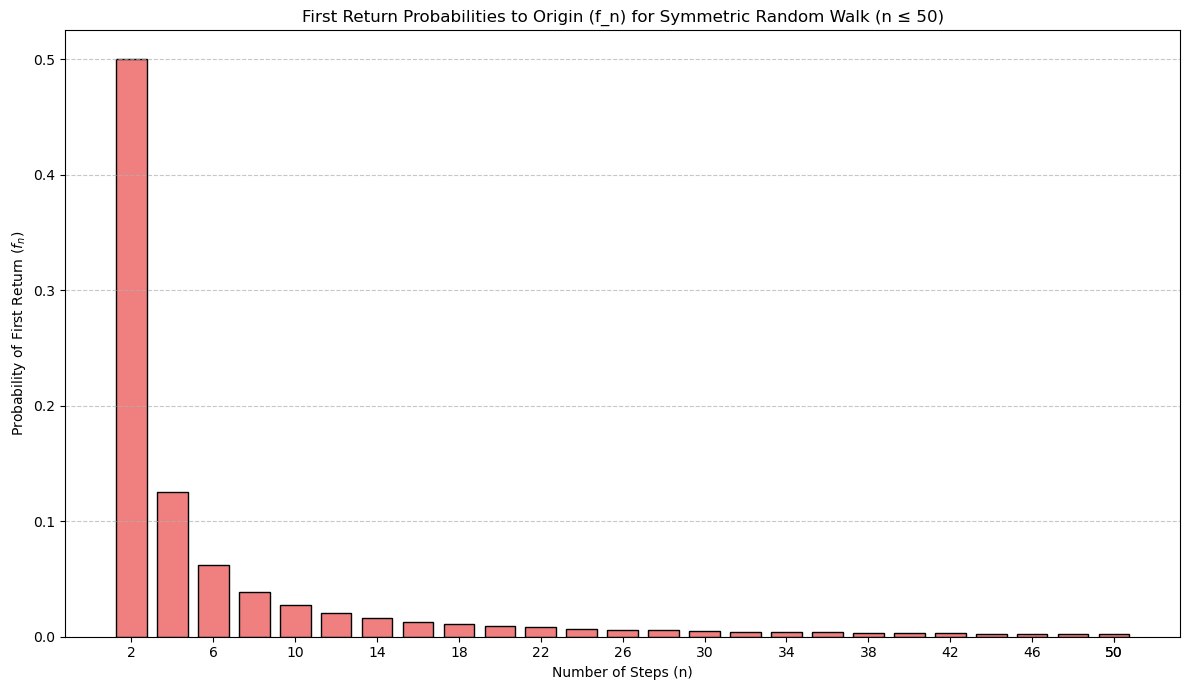

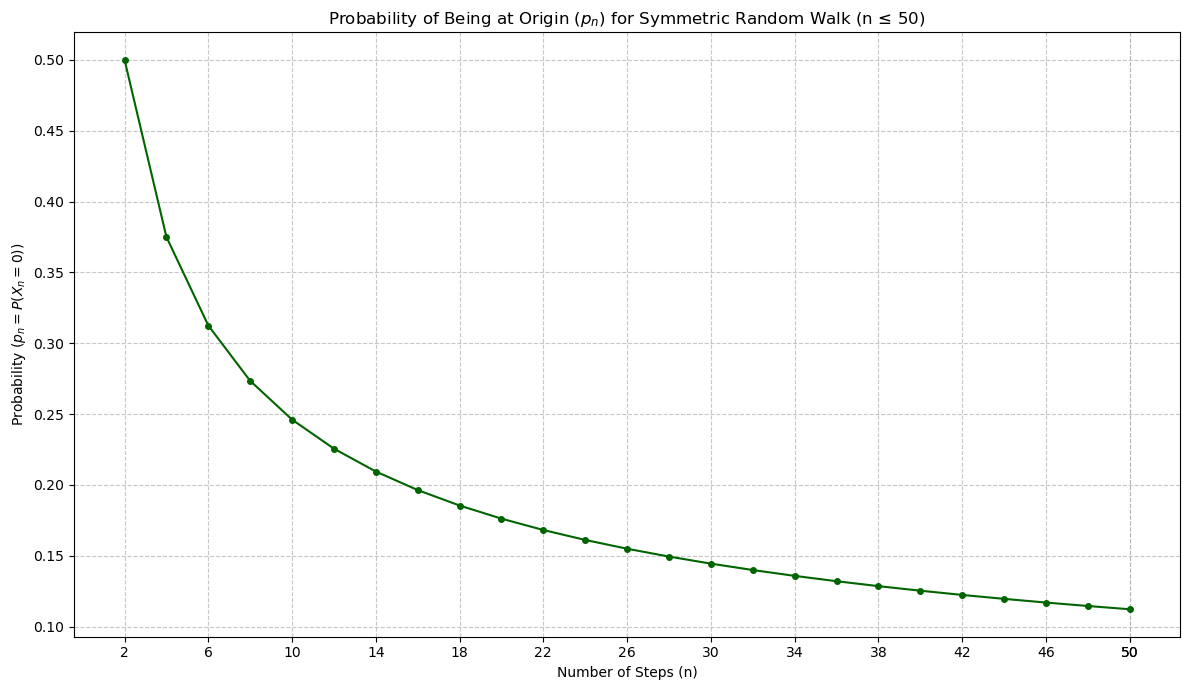

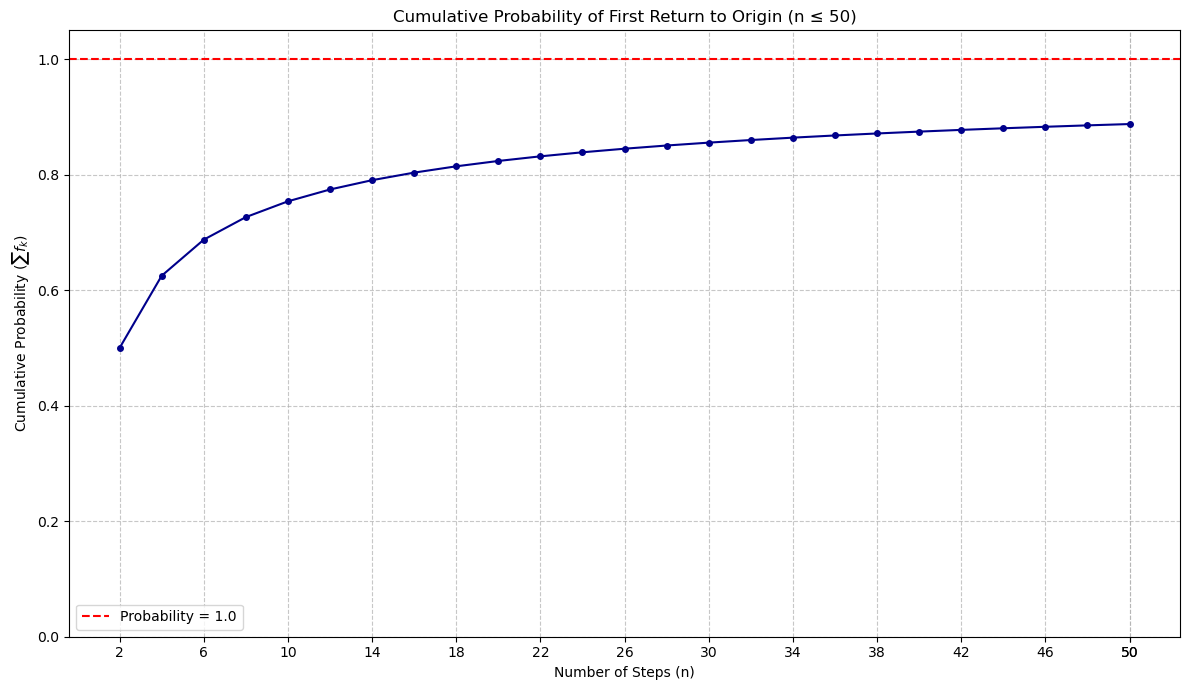

In [8]:
import matplotlib.pyplot as plt

# Re-using the functions from the previous turn for consistency
def _factorial(n):
    if n < 0:
        raise ValueError("Factorial is not defined for negative numbers.")
    if n == 0:
        return 1
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def _combinations(n, k):
    if k < 0 or k > n:
        return 0
    if k == 0 or k == n:
        return 1
    if k > n // 2:
        k = n - k
    
    numerator = _factorial(n)
    denominator = _factorial(k) * _factorial(n - k)
    return numerator // denominator

def calculate_exact_vnx(n, x, p):
    """
    Calculates the exact probability (v_n,x) that an unrestricted random walk
    starting at X0 = 0 is at position x after n steps.
    For symmetric first return, x=0 and p=0.5.
    """
    if not isinstance(n, int) or n < 0:
        raise ValueError("Number of steps (n) must be a non-negative integer.")
    if not isinstance(x, int):
        raise ValueError("Position (x) must be an integer.")
    if not (0 <= p <= 1):
        raise ValueError("Probability p must be between 0 and 1.")

    if (n + x) % 2 != 0:
        return 0.0

    r = (n + x) // 2
    l = n - r

    if r < 0 or l < 0:
        return 0.0

    q = 1.0 - p
    combinations = _combinations(n, r)
    prob = combinations * (p**r) * (q**l)

    return prob

def calculate_first_return_probabilities_symmetric(max_steps):
    """
    Calculates the first return probabilities f_2k for a symmetric random walk
    to the origin (X0=0) using the recurrence relation.
    """
    if not isinstance(max_steps, int) or max_steps <= 0 or max_steps % 2 != 0:
        raise ValueError("max_steps must be a positive even integer.")

    p_values = {}
    f_values = {}

    p_values[0] = 1.0

    for m in range(1, (max_steps // 2) + 1):
        current_n = 2 * m
        
        p_2m = calculate_exact_vnx(current_n, 0, 0.5)
        p_values[current_n] = p_2m

        sum_term = 0.0
        for k_idx in range(1, m):
            f_2k_val = f_values.get(2 * k_idx, 0.0)
            p_val = p_values.get(current_n - (2 * k_idx), 0.0)
            sum_term += p_val * f_2k_val
        
        f_2m = p_2m - sum_term
        f_values[current_n] = f_2m
    
    return f_values, p_values

# --- Generate data for plotting ---
max_steps_for_plots = 50 # Choose a reasonable number of steps for visualization
first_returns_f, p_vals_p = calculate_first_return_probabilities_symmetric(max_steps_for_plots)

# Extract steps and probabilities for plotting
steps_f = sorted(first_returns_f.keys())
probs_f = [first_returns_f[s] for s in steps_f]

steps_p = sorted(p_vals_p.keys())[1:] # Exclude p_0 for plotting
probs_p = [p_vals_p[s] for s in steps_p]

# --- Plot 1: First Return Probabilities (f_n) ---
plt.figure(figsize=(12, 7))
plt.bar(steps_f, probs_f, width=1.5, color='lightcoral', edgecolor='black')
plt.title(f'First Return Probabilities to Origin (f_n) for Symmetric Random Walk (n ≤ {max_steps_for_plots})')
plt.xlabel('Number of Steps (n)')
plt.ylabel('Probability of First Return ($f_n$)')
plt.xticks(steps_f[::2] + [steps_f[-1]] if len(steps_f) > 0 else []) # Show fewer ticks for clarity if many steps
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot 2: Probability of Being at Origin (p_n) ---
plt.figure(figsize=(12, 7))
plt.plot(steps_p, probs_p, marker='o', linestyle='-', color='darkgreen', markersize=4)
plt.title(f'Probability of Being at Origin ($p_n$) for Symmetric Random Walk (n ≤ {max_steps_for_plots})')
plt.xlabel('Number of Steps (n)')
plt.ylabel('Probability ($p_n = P(X_n = 0)$)')
plt.xticks(steps_p[::2] + [steps_p[-1]] if len(steps_p) > 0 else [])
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot 3: Cumulative Sum of First Return Probabilities ---
cumulative_probs = []
current_sum = 0.0
for prob in probs_f:
    current_sum += prob
    cumulative_probs.append(current_sum)

plt.figure(figsize=(12, 7))
plt.plot(steps_f, cumulative_probs, marker='o', linestyle='-', color='darkblue', markersize=4)
plt.axhline(y=1.0, color='r', linestyle='--', label='Probability = 1.0')
plt.title(f'Cumulative Probability of First Return to Origin (n ≤ {max_steps_for_plots})')
plt.xlabel('Number of Steps (n)')
plt.ylabel('Cumulative Probability ($\sum f_k$)')
plt.xticks(steps_f[::2] + [steps_f[-1]] if len(steps_f) > 0 else [])
plt.ylim(0, 1.05) # Set y-axis limit to clearly show convergence to 1
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()

In other words a symmetric random walk which starts at the origin is certain to return there in the future, but, on average, it will take an infinite number of steps.

**Example 3.2** Find the probability that a symmetric random walk starting from the origin returns there for the first time after 6 steps.

We require the coefficient of $s^6$ in the power series expansion of the pgf $F(s)$, which is
$$F(s) = 1 - (1 - s^2)^{1/2}$$
Using the binomial expansion for $(1-x)^\alpha = 1 - \alpha x + \frac{\\alpha(\\alpha-1)}{2\!}x^2 - \frac{\alpha(\alpha-1)(\alpha-2)}{3\!}x^3 + \ldots$ with $\\alpha = 1/2$ and $x = s^2$:
\\begin{align\*} (1 - s^2)^{1/2} &= 1 - \\frac{1}{2}s^2 + \\frac{\\frac{1}{2}(\\frac{1}{2}-1)}{2\!}(s^2)^2 - \\frac{\\frac{1}{2}(\\frac{1}{2}-1)(\\frac{1}{2}-2)}{3\!}(s^2)^3 + O(s^8) \\ &= 1 - \\frac{1}{2}s^2 + \\frac{\\frac{1}{2}(-\\frac{1}{2})}{2}s^4 - \\frac{\\frac{1}{2}(-\\frac{1}{2})(-\\frac{3}{2})}{6}s^6 + O(s^8) \\ &= 1 - \\frac{1}{2}s^2 - \\frac{1}{8}s^4 - \\frac{1}{16}s^6 + O(s^8) \\end{align\*}
Therefore,
$$F(s) = 1 - \left[1 - \frac{1}{2}s^2 - \frac{1}{8}s^4 - \frac{1}{16}s^6 + O(s^8)\right]$$$$F(s) = \frac{1}{2}s^2 + \frac{1}{8}s^4 + \frac{1}{16}s^6 + O(s^8)$$
Hence the probability of a first return at step 6 is $\\frac{1}{16}$.

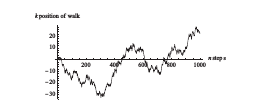

**Fig.2:** Two computer simulations of symmetric random walks of 1,000 steps each.
It might be expected intuitively that the walk would tend to oscillate about the starting position $k = 0$ by some law of averages. But a feature of such walks is how few times the walk recrosses the axis $k = 0$. In fact in the first case, after a brief oscillation about $k = 0$, the walk does not return to the start and finishes some $70$ paces away. Intuition can be misleading in these problems. Remember that the expected state is the average of many walks. A full discussion of this phenomena can be found in Feller (1968).
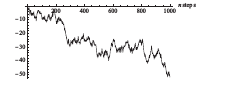

**Fig.3** A symmetric random walk starts at $x = 0$. Find the probabilities that the walk:

--- Example 3.2: First Return Probability f_6 ---
The probability of first return at step 6 (f_6) is: 0.0625000
  (Text's expected value: 1/16 = 0.0625)


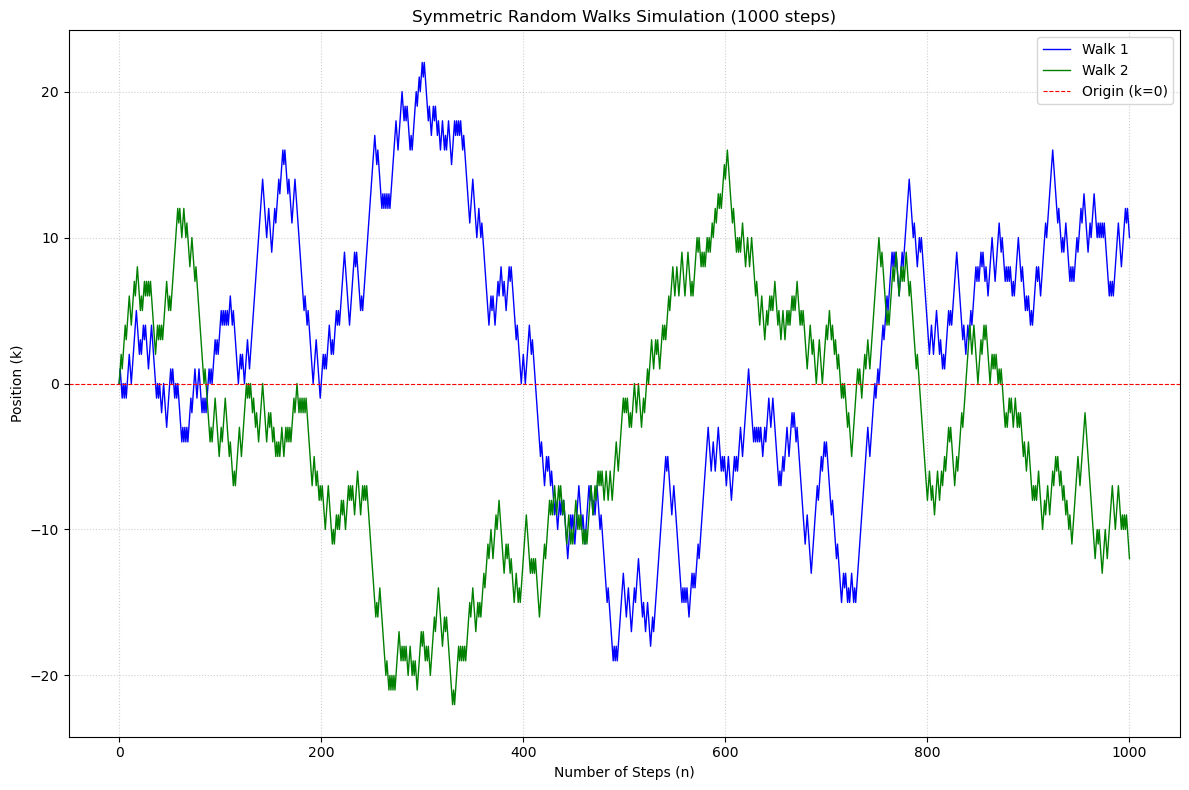


--- Simulation Summary (1000 steps) ---
Final position of Walk 1: 10
Final position of Walk 2: -12
Note: As seen in the figure and discussed in the text, random walks often do not return to the origin and can drift significantly, even for symmetric walks.


In [10]:
import math
import random
import matplotlib.pyplot as plt

# --- Re-using helper functions for factorials and combinations ---
# (from previous implementations, necessary for binomial coefficients)
def _factorial(n):
    if n < 0:
        raise ValueError("Factorial is not defined for negative numbers.")
    if n == 0:
        return 1
    result = 1
    for i in range(1, n + 1):
        result *= i
    return result

def _combinations(n, k):
    if k < 0 or k > n:
        return 0
    if k == 0 or k == n:
        return 1
    if k > n // 2:
        k = n - k
    
    numerator = _factorial(n)
    denominator = _factorial(k) * _factorial(n - k)
    return numerator // denominator

# --- Function to calculate generalized binomial coefficients C(alpha, k) ---
# Needed for the generating function F(s) = 1 - (1 - s^2)^1/2
def _generalized_combinations(alpha, k):
    """
    Calculates the generalized binomial coefficient C(alpha, k).
    C(alpha, k) = alpha * (alpha - 1) * ... * (alpha - k + 1) / k!
    """
    if k < 0:
        return 0.0
    if k == 0:
        return 1.0
    
    numerator = 1.0
    for i in range(k):
        numerator *= (alpha - i)
    
    denominator = _factorial(k)
    return numerator / denominator

# --- Implementation for Example 3.2: f_6 from Generating Function ---
def calculate_f_2m_from_gen_func(m):
    """
    Calculates the first return probability f_2m (coefficient of s^(2m) in F(s))
    for a symmetric random walk, using the formula derived from its generating function:
    f_2m = (-1)^(m+1) * C(1/2, m)
    """
    if m <= 0:
        raise ValueError("m must be a positive integer for f_2m calculation.")
    
    alpha = 0.5 # Corresponds to the exponent 1/2 in (1 - s^2)^1/2
    k = m       # Corresponds to the power of s^2
    
    # Calculate C(1/2, m)
    coeff_C_half_m = _generalized_combinations(alpha, k)
    
    # Apply the formula: f_2m = (-1)^(m+1) * C(1/2, m)
    f_2m = ((-1)**(m + 1)) * coeff_C_half_m
    
    return f_2m

# Calculate f_6 (where 2m = 6, so m = 3)
f6_calculated = calculate_f_2m_from_gen_func(m=3)
print("--- Example 3.2: First Return Probability f_6 ---")
print(f"The probability of first return at step 6 (f_6) is: {f6_calculated:.7f}")
print(f"  (Text's expected value: 1/16 = 0.0625)")

# --- Implementation for Random Walk Simulation (Figure 3.2) ---
def simulate_random_walk(num_steps):
    """
    Simulates a symmetric random walk starting at 0.
    Returns a list of positions at each step (including initial X0=0).
    """
    positions = [0] # Start at X0 = 0
    current_position = 0

    for _ in range(num_steps):
        step = random.choice([-1, 1]) # Symmetric walk: +1 or -1 with 50% chance
        current_position += step
        positions.append(current_position)
    
    return positions

# Simulate two random walks as in Figure 3.2
num_simulation_steps = 1000
walk1_positions = simulate_random_walk(num_simulation_steps)
walk2_positions = simulate_random_walk(num_simulation_steps)

# Plotting the simulations
plt.figure(figsize=(12, 8))

# Plot Walk 1
plt.plot(range(num_simulation_steps + 1), walk1_positions, label='Walk 1', color='blue', linewidth=1)
# Plot Walk 2
plt.plot(range(num_simulation_steps + 1), walk2_positions, label='Walk 2', color='green', linewidth=1)

plt.axhline(0, color='red', linestyle='--', linewidth=0.8, label='Origin (k=0)') # Highlight the origin
plt.title(f'Symmetric Random Walks Simulation ({num_simulation_steps} steps)')
plt.xlabel('Number of Steps (n)')
plt.ylabel('Position (k)')
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Optional: Print final positions
print(f"\n--- Simulation Summary ({num_simulation_steps} steps) ---")
print(f"Final position of Walk 1: {walk1_positions[-1]}")
print(f"Final position of Walk 2: {walk2_positions[-1]}")
print("Note: As seen in the figure and discussed in the text, random walks often do not return to the origin and can drift significantly, even for symmetric walks.")